In [ ]:
from Research Agent import AIResearchAgent 

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:
import asyncio
import json
import logging
from datetime import datetime
from typing import List, Dict, Any, TypedDict, Annotated
import operator

from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langchain_core.tools import Tool
from langchain_openai import ChatOpenAI
from langchain_community.utilities import SerpAPIWrapper, ArxivAPIWrapper
from langchain_community.document_loaders import ArxivLoader, WebBaseLoader
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from pydantic import BaseModel, Field

from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
from langgraph.checkpoint.sqlite import SqliteSaver

from dotenv import load_dotenv
import os
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

SERP_API_KEY = os.getenv("SERPAPI_API_KEY")


agent = AIResearchAgent(OPENAI_API_KEY,SERP_API_KEY)

from pydantic import BaseModel, Field

from typing import List, Dict, Any

class AgentState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    query: str
    plan: Dict[str, Any]
    search_results: List[Dict[str, Any]]
    documents: List[Dict[str, Any]]
    summaries: List[str]
    final_report: str
    iteration_count: int
    max_iterations: int


example_query = "Find me 3 most important research papers that led to the development of Large Language Models (LLMs)."

initial_state = AgentState(
            messages=[HumanMessage(content=example_query)],
            query=example_query,
            plan={},
            search_results=[],
            documents=[],
            summaries=[],
            final_report="",
            iteration_count=0,
            max_iterations=5
        )        
final_state = agent.graph.invoke(initial_state)
    


INFO:temp:Planning research operations...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:temp:Plan: arxiv_search - Since the current search results count is 0, I will search ArXiv for academic papers specifically related to the development of Large Language Models. ArXiv is a key repository for research papers in the field of machine learning and natural language processing, which is likely to yield relevant results.
INFO:temp:Performing ArXiv search...
INFO:arxiv:Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=important+papers+on+Large+Language+Models&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100
INFO:arxiv:Got first page: 100 of 2425135 total results
INFO:temp:Found ArXiv search results
INFO:temp:Planning research operations...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:temp:Plan: arxiv_search - Since the current search 

In [3]:
print(final_state['final_report'])

# Research Report on the Development of Large Language Models (LLMs)

## 1. Executive Summary
This report identifies and analyzes three pivotal research papers that have significantly contributed to the development of Large Language Models (LLMs). These papers highlight advancements in multilingual capabilities, program synthesis, and the challenges of low-resource language processing. The findings underscore the evolution of LLMs from traditional models to sophisticated pre-trained systems, emphasizing their applications and limitations. The report concludes with recommendations for future research directions and dataset enhancements to further advance the field.

## 2. Key Findings from the Research
- **Advancements in Multilingual Models**: The transition from N-gram models to pre-trained multilingual models has improved language identification tasks, showcasing the effectiveness of LLMs in handling diverse languages.
- **Program Synthesis Capabilities**: LLMs like GPT-3 have demons

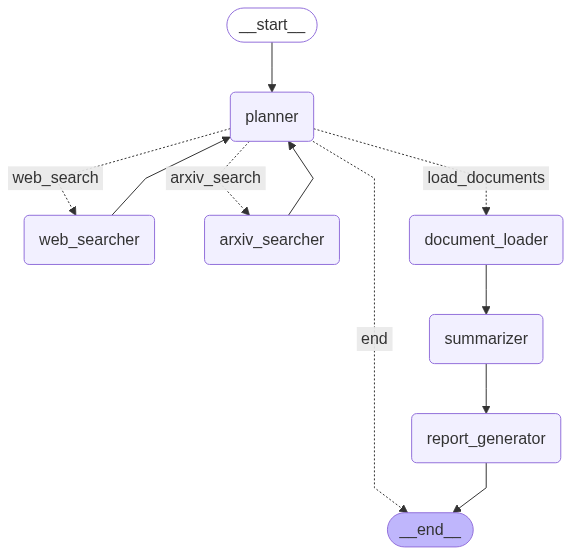

In [4]:
from IPython.display import Image, display
display(Image(agent.graph.get_graph().draw_mermaid_png()))